# LAB 2 – Image Filtering (with and without Libraries) 
### Aim: To apply and manually implement various filtering and thresholding techniques for image enhancement. 
### Objectives: 
- **Use OpenCV functions for thresholding (global, adaptive, Otsu).**
- **Apply blurring and smoothing filters (average, Gaussian, median, bilateral).**
- **Manually implement basic filters and convolution operations.**
- **Understand and compare the performance of library vs manual filters.**
- **Visualize the effects of filters on image noise and edge sharpness.** 

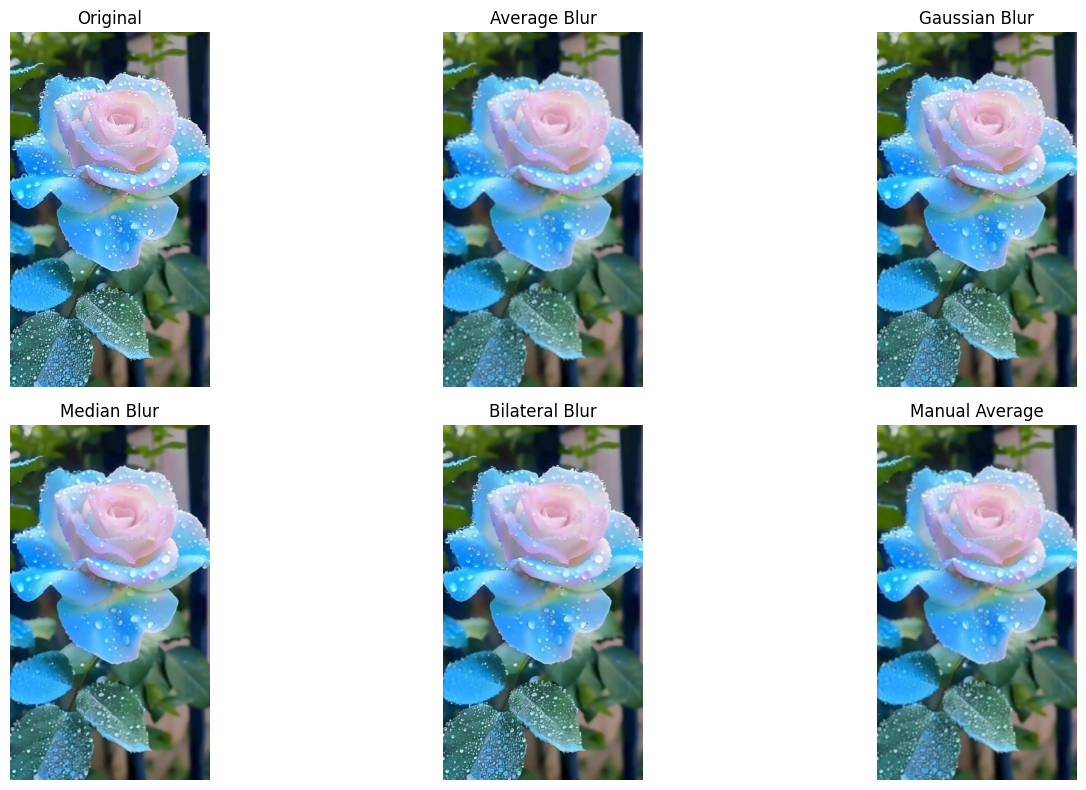

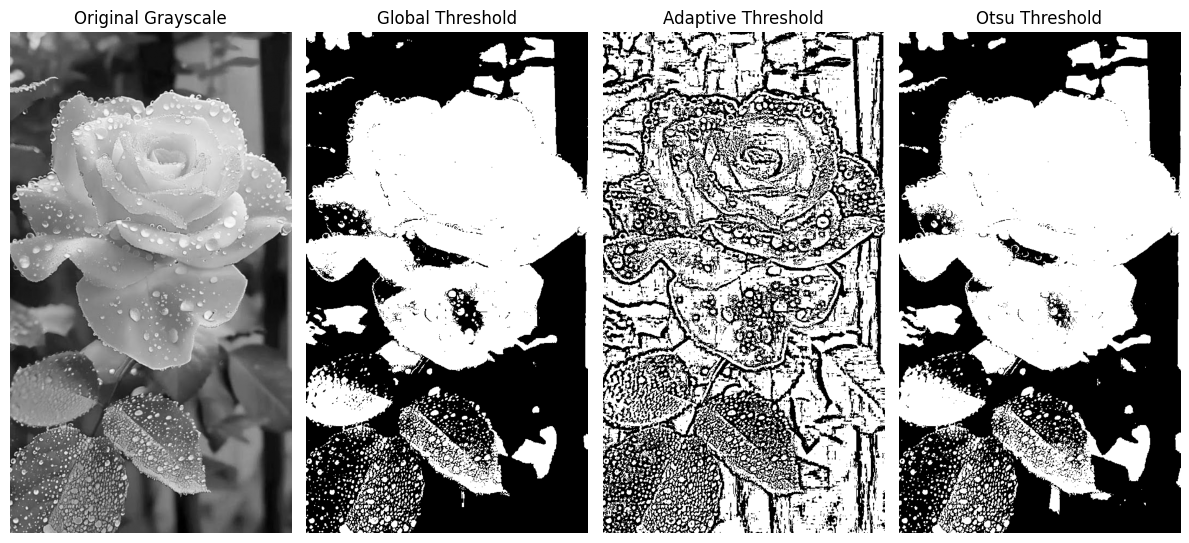

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the image
img = cv2.imread(r"C:\Users\SHRAVINYA\Downloads\lab2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Step 2: Apply thresholding techniques
_, thresh_global = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
thresh_adaptive = cv2.adaptiveThreshold(
    gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2
)
_, thresh_otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Step 3: Apply library-based filters
average_blur = cv2.blur(img, (5, 5))
gaussian_blur = cv2.GaussianBlur(img, (5, 5), 0)
median_blur = cv2.medianBlur(img, 5)
bilateral_blur = cv2.bilateralFilter(img, 9, 75, 75)

# Step 4: Manual implementation of average filter using convolution
kernel = np.ones((5, 5), np.float32) / 25
manual_average = cv2.filter2D(img, -1, kernel)

# Step 5: Compare effects (original vs filtered images)
titles = ['Original', 'Average Blur', 'Gaussian Blur', 'Median Blur', 'Bilateral Blur', 'Manual Average']
images = [img, average_blur, gaussian_blur, median_blur, bilateral_blur, manual_average]

plt.figure(figsize=(15, 8))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

# Step 6: Show thresholding results
titles_thresh = ['Original Grayscale', 'Global Threshold', 'Adaptive Threshold', 'Otsu Threshold']
images_thresh = [gray, thresh_global, thresh_adaptive, thresh_otsu]

plt.figure(figsize=(12, 6))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(images_thresh[i], cmap='gray')
    plt.title(titles_thresh[i])
    plt.axis('off')
plt.tight_layout()
plt.show()
